In [2]:
import pandas as pd
import numpy as np

In [3]:

rnn_df = pd.read_csv(r"C:\Users\Shreyansh Singh\Downloads\Weather_Data.csv")
print(rnn_df.dtypes)

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object


In [4]:
rnn_df.head(10)


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,1/1/2012 7:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,1/1/2012 8:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,1/1/2012 9:00,-1.3,-3.1,88,15,4.0,101.20,Fog


In [5]:
rnn_df['Wind Speed_km/h'].max()

83

In [6]:
rnn_df['Date/Time'] = pd.to_datetime(rnn_df['Date/Time'])
rnn_df.set_index('Date/Time', inplace = True)
rnn_df.head(10)

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog
2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog
2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog
2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog


In [7]:
features = ['Temp_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa']
rnn_df = rnn_df[features].fillna(method='ffill')
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rnn_df = scaler.fit_transform(rnn_df)
print(rnn_df)
import joblib
joblib.dump(scaler,'scaler.pkl')


C:\Users\Shreyansh Singh\AppData\Local\Temp\ipykernel_22020\3225528155.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rnn_df = rnn_df[features].fillna(method='ffill')


[[0.38188277 0.46502836 0.82926829 0.04819277 0.16216216 0.60685155]
 [0.38188277 0.46880907 0.84146341 0.04819277 0.16216216 0.60685155]
 [0.38188277 0.47448015 0.86585366 0.08433735 0.07900208 0.61011419]
 ...
 [0.40497336 0.51039698 0.91463415 0.3373494  0.0956341  0.39641109]
 [0.41030195 0.5047259  0.86585366 0.3373494  0.1975052  0.38988581]
 [0.41385435 0.49905482 0.82926829 0.36144578 0.23076923 0.38662316]]


['scaler.pkl']

In [8]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length, 0])  # Predicting the temperature
    return np.array(sequences), np.array(labels)

sequence_length = 3
X, y = create_sequences(rnn_df, sequence_length)
split = int(0.8*len(X))
X_train , X_test = X[:split] , X[split:]
y_train , y_test = y[:split] , y[split:]
print(X_train)

[[[0.38188277 0.46502836 0.82926829 0.04819277 0.16216216 0.60685155]
  [0.38188277 0.46880907 0.84146341 0.04819277 0.16216216 0.60685155]
  [0.38188277 0.47448015 0.86585366 0.08433735 0.07900208 0.61011419]]

 [[0.38188277 0.46880907 0.84146341 0.04819277 0.16216216 0.60685155]
  [0.38188277 0.47448015 0.86585366 0.08433735 0.07900208 0.61011419]
  [0.38721137 0.47826087 0.85365854 0.07228916 0.07900208 0.61174551]]

 [[0.38188277 0.47448015 0.86585366 0.08433735 0.07900208 0.61011419]
  [0.38721137 0.47826087 0.85365854 0.07228916 0.07900208 0.61174551]
  [0.38721137 0.47637051 0.85365854 0.08433735 0.0956341  0.60522023]]

 ...

 [[0.64653641 0.7637051  0.90243902 0.20481928 0.26403326 0.50897227]
  [0.64476021 0.76748582 0.92682927 0.18072289 0.16216216 0.49429038]
  [0.65008881 0.76748582 0.90243902 0.15662651 0.1975052  0.47797716]]

 [[0.64476021 0.76748582 0.92682927 0.18072289 0.16216216 0.49429038]
  [0.65008881 0.76748582 0.90243902 0.15662651 0.1975052  0.47797716]
  [0.6

In [9]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN , Dense
clear_session()

model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(sequence_length, X_train.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)


c:\Users\Shreyansh Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1054 - val_loss: 0.0011
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.2776e-04 - val_loss: 8.1578e-04
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.8577e-04 - val_loss: 7.6468e-04
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.5225e-04 - val_loss: 7.2771e-04
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.8481e-04 - val_loss: 6.6078e-04
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.1159e-04 - val_loss: 6.3511e-04
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.9638e-04 - val_loss: 4.8337e-04
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.8009e-04 - val_loss: 4.5149e-04
Epoch 10/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.7536e-04 - val_loss: 4.1836e-04
Epoch 11/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.7732e-04 - v

In [10]:
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3695e-04
Test Loss: 0.0002136960974894464


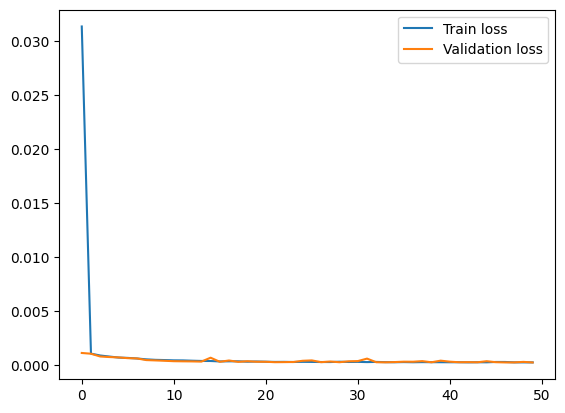

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'] , label = ['Train loss'])
plt.plot(history.history['val_loss'] , label = ['Validation loss'])
plt.legend()
plt.show()


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


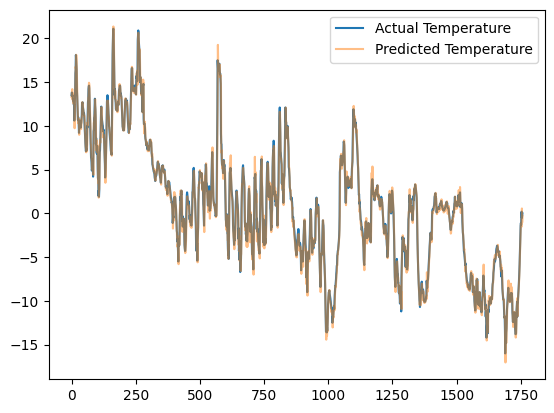

In [12]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], rnn_df.shape[1] - 1))), axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], rnn_df.shape[1] - 1))), axis=1))[:, 0]

# Plot predictions vs actual
plt.plot(y_test_actual, label='Actual Temperature')
plt.plot(predictions, label='Predicted Temperature' , alpha = 0.5)
plt.legend()
plt.show()

In [13]:
model.save('weather_rnn.h5')

In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load and preprocess the dataset
log_df = pd.read_csv(r"C:\Users\Shreyansh Singh\Downloads\Weather_Data.csv")
log_df['Date/Time'] = pd.to_datetime(log_df['Date/Time'])
log_df.set_index('Date/Time', inplace=True)
X_log = log_df.drop(columns=['Weather'], axis=1)
y_log = log_df['Weather']
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_log_train_scaled = scaler.fit_transform(X_log_train)
X_log_test_scaled = scaler.transform(X_log_test)
X_log_train_scaled_df = pd.DataFrame(X_log_train_scaled, columns=X_log_train.columns, index=X_log_train.index)
X_log_test_scaled_df = pd.DataFrame(X_log_test_scaled, columns=X_log_test.columns, index=X_log_test.index)
log_df.update(X_log_train_scaled_df)
log_df.update(X_log_test_scaled_df)
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_log_train_scaled_df , y_log_train)
predict_log = log.predict(X_log_test_scaled_df)
from sklearn.metrics import accuracy_score
print(accuracy_score(predict_log , y_log_test))

C:\Users\Shreyansh Singh\AppData\Local\Temp\ipykernel_22020\1752824563.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[86.          0.84146341  0.86585366 ...  0.91463415 89.
 86.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  log_df.update(X_log_train_scaled_df)
C:\Users\Shreyansh Singh\AppData\Local\Temp\ipykernel_22020\1752824563.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 4.          0.04819277  0.08433735 ...  0.3373494  28.
 30.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  log_df.update(X_log_train_scaled_df)


0.37677859988616963


In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load and preprocess the dataset
log_df = pd.read_csv(r"C:\Users\Shreyansh Singh\Downloads\Weather_Data.csv")
log_df['Date/Time'] = pd.to_datetime(log_df['Date/Time'])
log_df.set_index('Date/Time', inplace=True)

X_log = log_df.drop(columns=['Weather'], axis=1)
y_log = log_df['Weather']

X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_log_train_scaled = scaler.fit_transform(X_log_train)

X_log_test_scaled = scaler.transform(X_log_test)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC()
}

for model_name, model in models.items():
    model.fit(X_log_train_scaled, y_log_train)
    y_log_pred = model.predict(X_log_test_scaled)
    accuracy = accuracy_score(y_log_test, y_log_pred)
    print(f'{model_name} Accuracy: {accuracy:.2f}')


Logistic Regression Accuracy: 0.38
Random Forest Accuracy: 0.53
Gradient Boosting Accuracy: 0.44
SVM Accuracy: 0.40
